# Визуализация

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

sns.set()

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [5]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
df = pd.read_csv(DATA_URL + "telecom_churn.csv")

In [6]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

## Колличесвтенные признаки

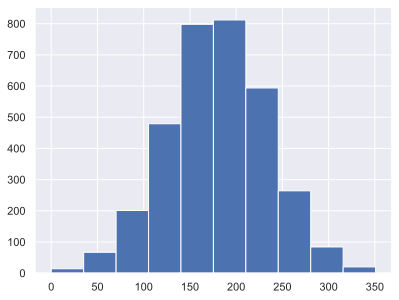

In [9]:
df["Total day minutes"].hist();

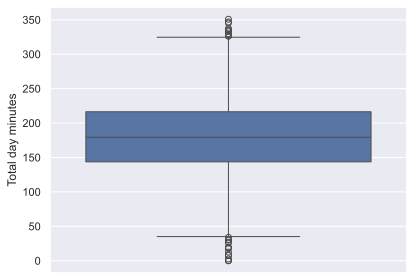

In [11]:
sns.boxplot(df["Total day minutes"]);

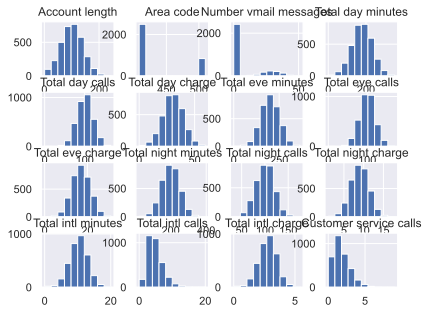

In [13]:
df.hist();

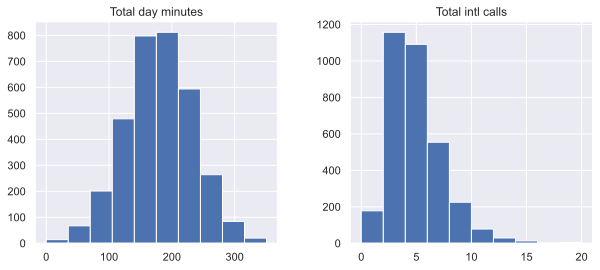

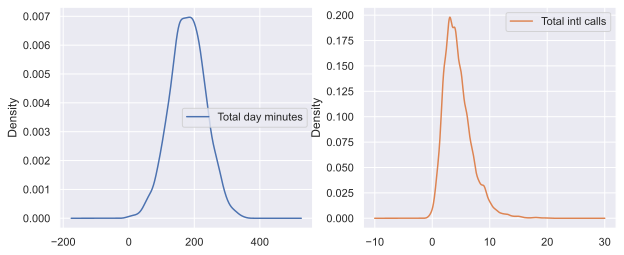

In [15]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4));
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

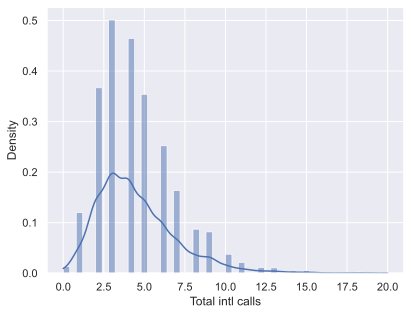

In [16]:
sns.histplot(df["Total intl calls"], kde=True, stat="density");

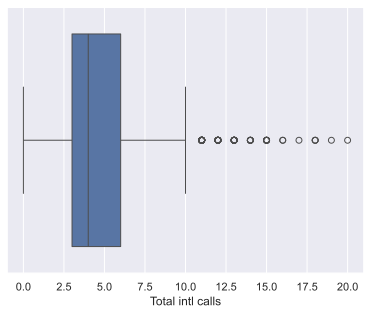

In [17]:
sns.boxplot(x="Total intl calls", data=df);

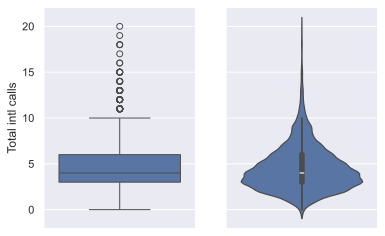

In [18]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

## Категориальные и бинарные признаки

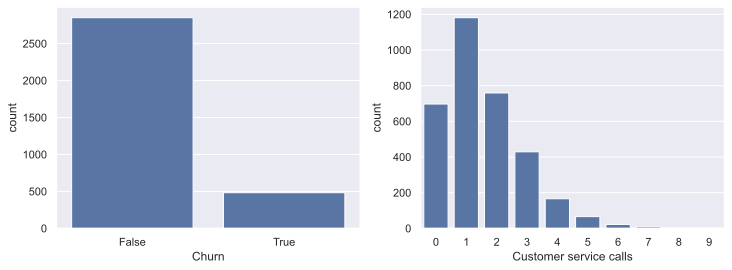

In [20]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1]);

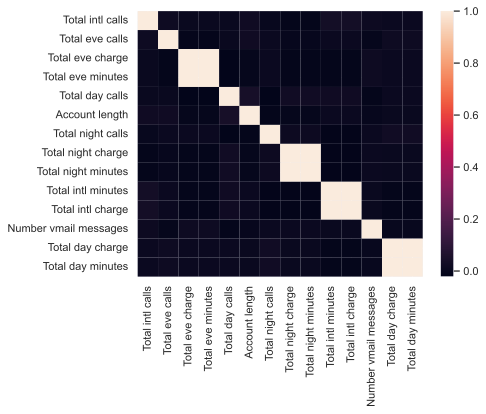

In [21]:
numerical = list(
    set(df.columns)
    - set(
        [
            "State",
            "International plan",
            "Voice mail plan",
            "Area code",
            "Churn",
            "Customer service calls",
        ]
    )
)

corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

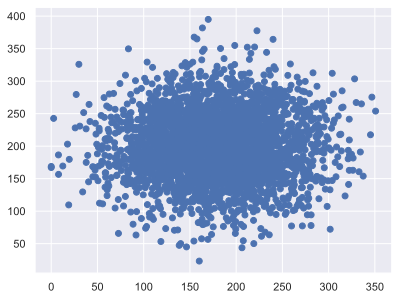

In [23]:
plt.scatter(df["Total day minutes"], df["Total night minutes"]);

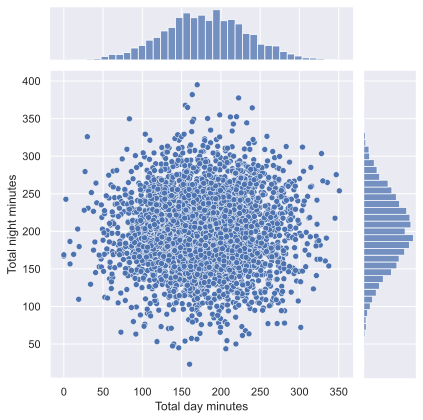

In [24]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter");

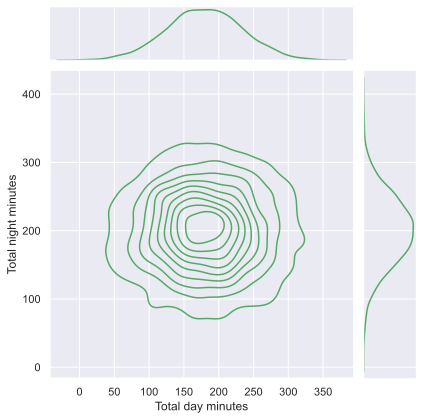

In [25]:
sns.jointplot(
    x="Total day minutes", y="Total night minutes", data=df, kind="kde", color="g"
);

/Users/timurandronaki/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


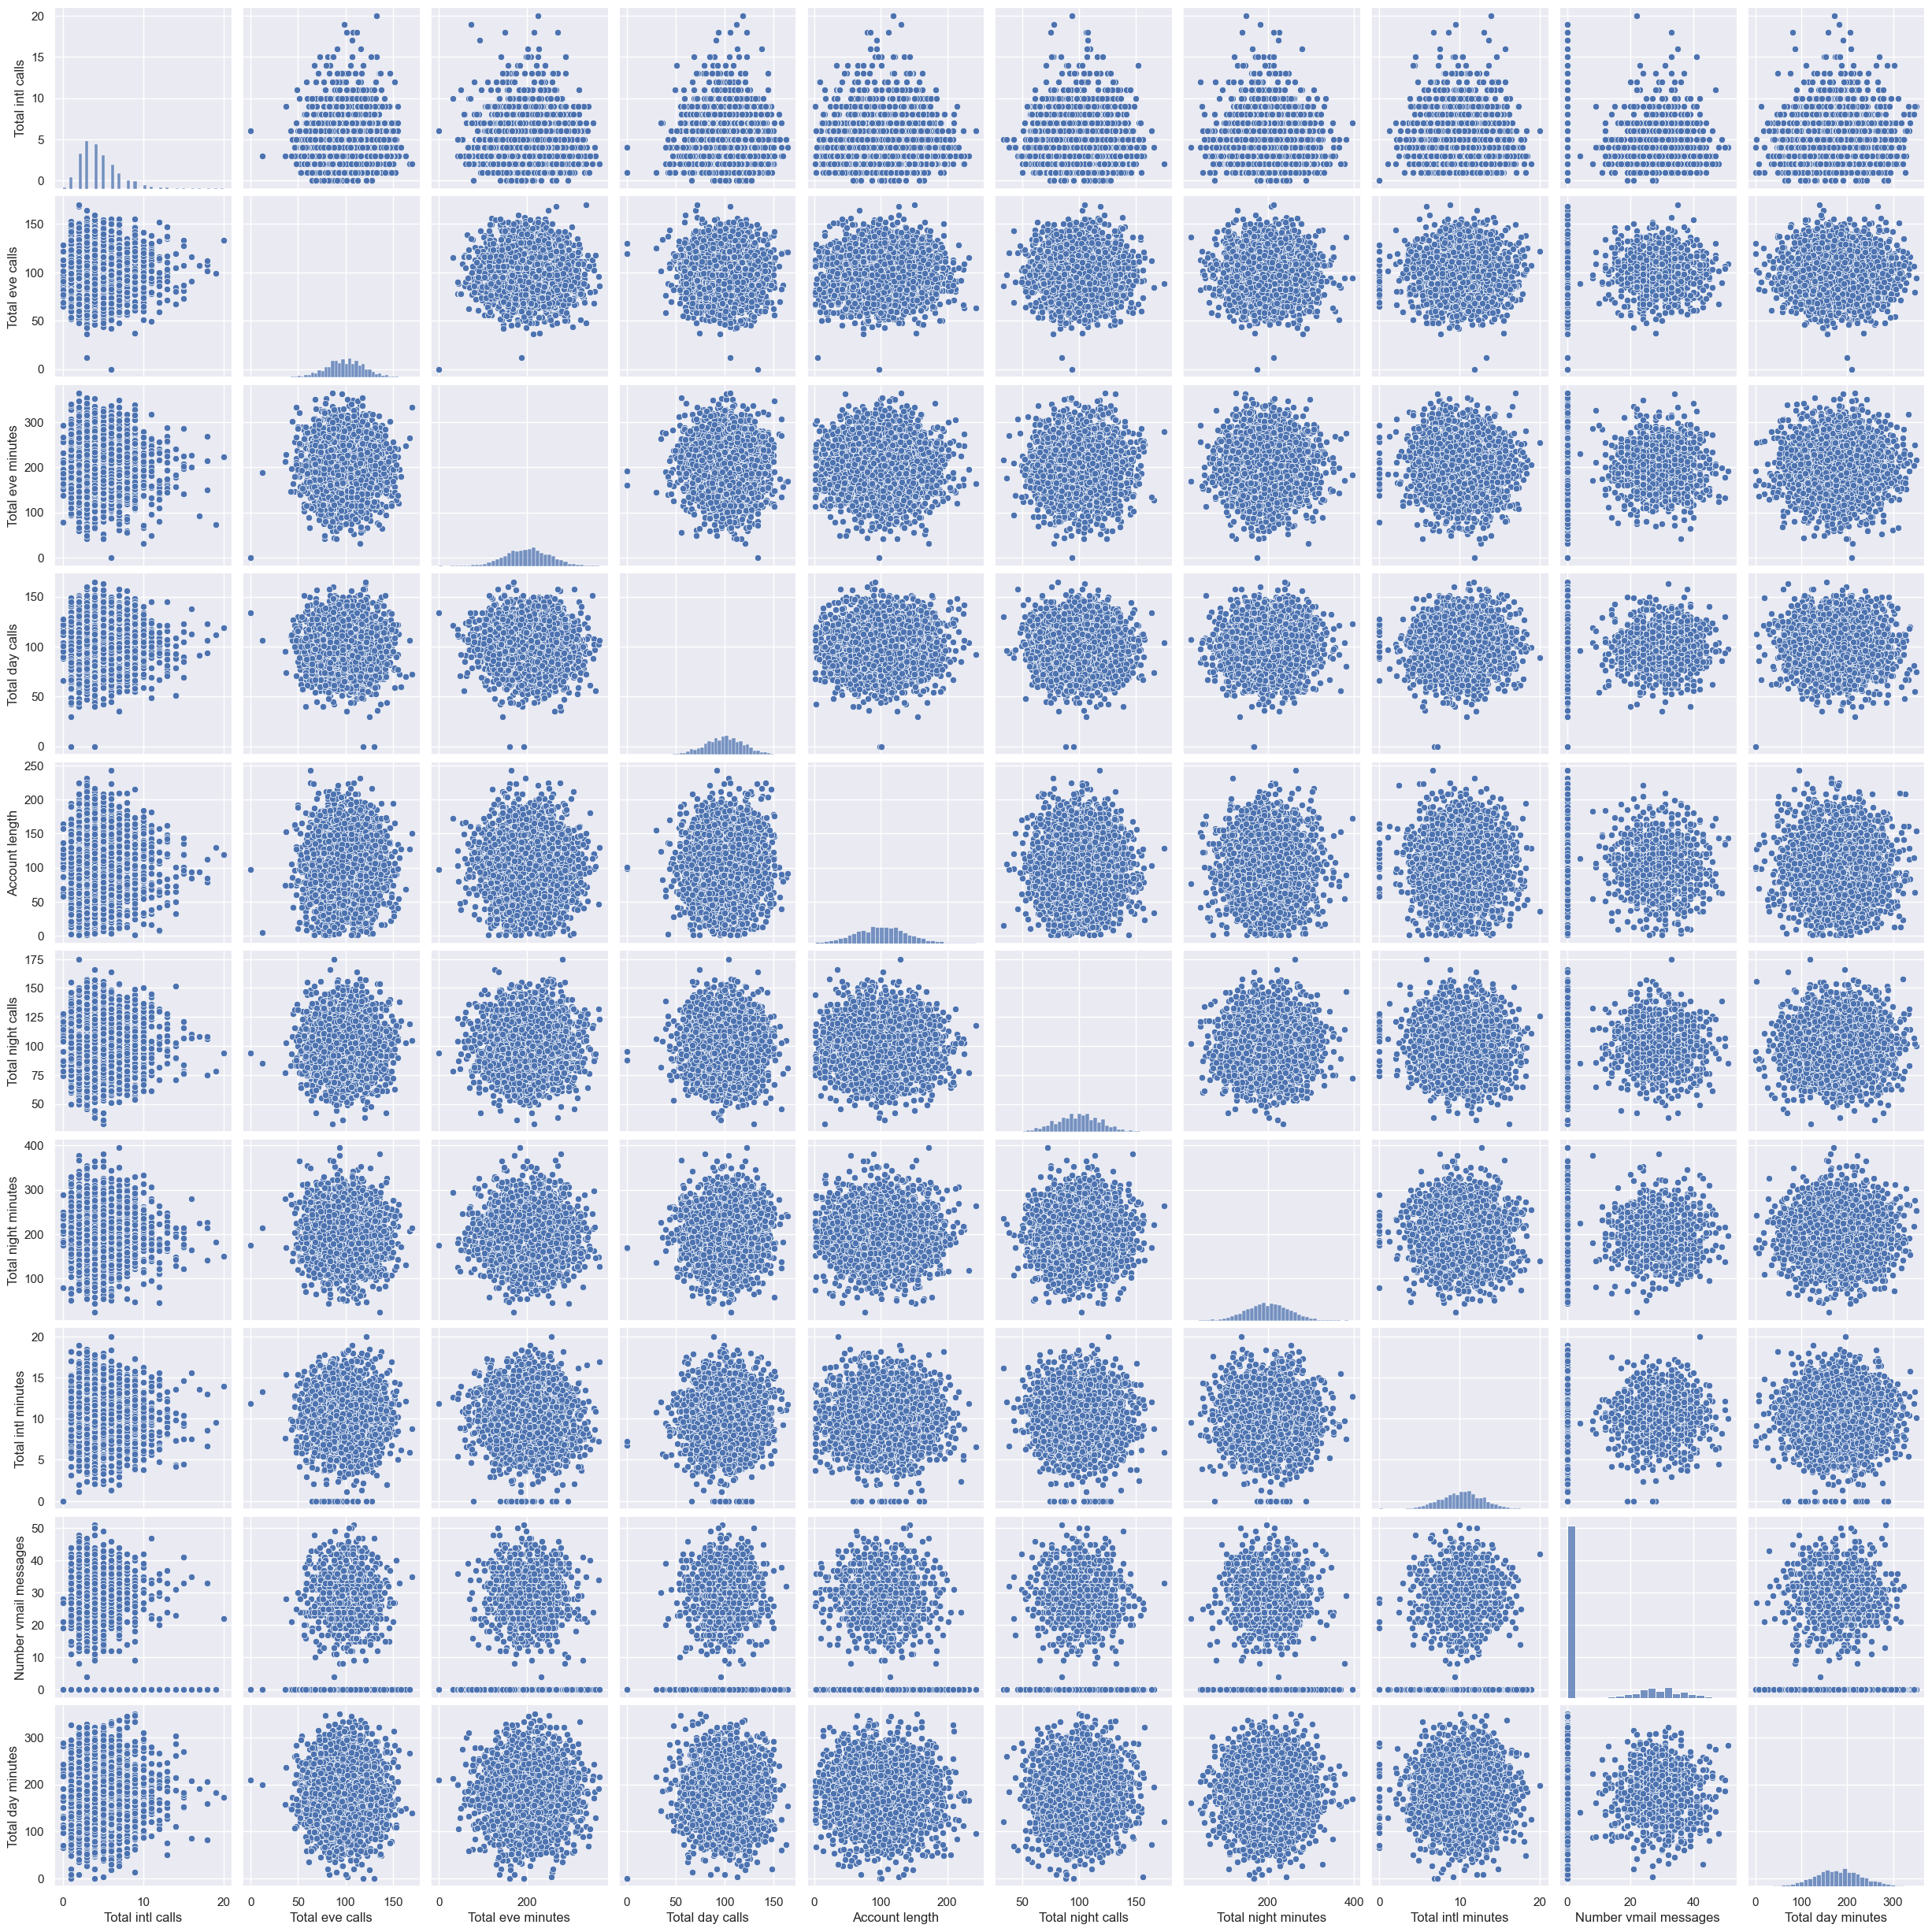

In [26]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

/Users/timurandronaki/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


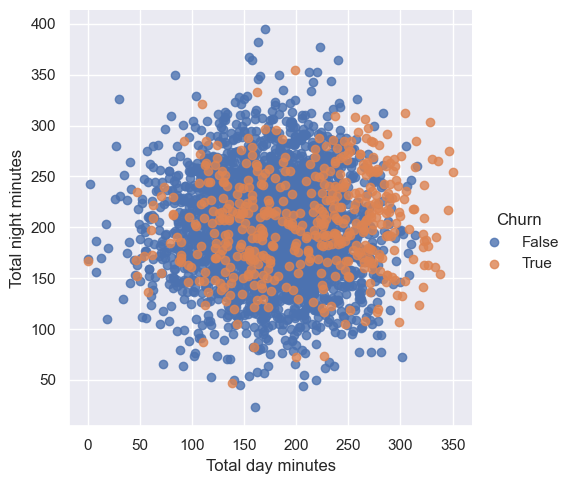

In [27]:
sns.lmplot(
    x="Total day minutes", y="Total night minutes", data=df, hue="Churn", fit_reg=False
);

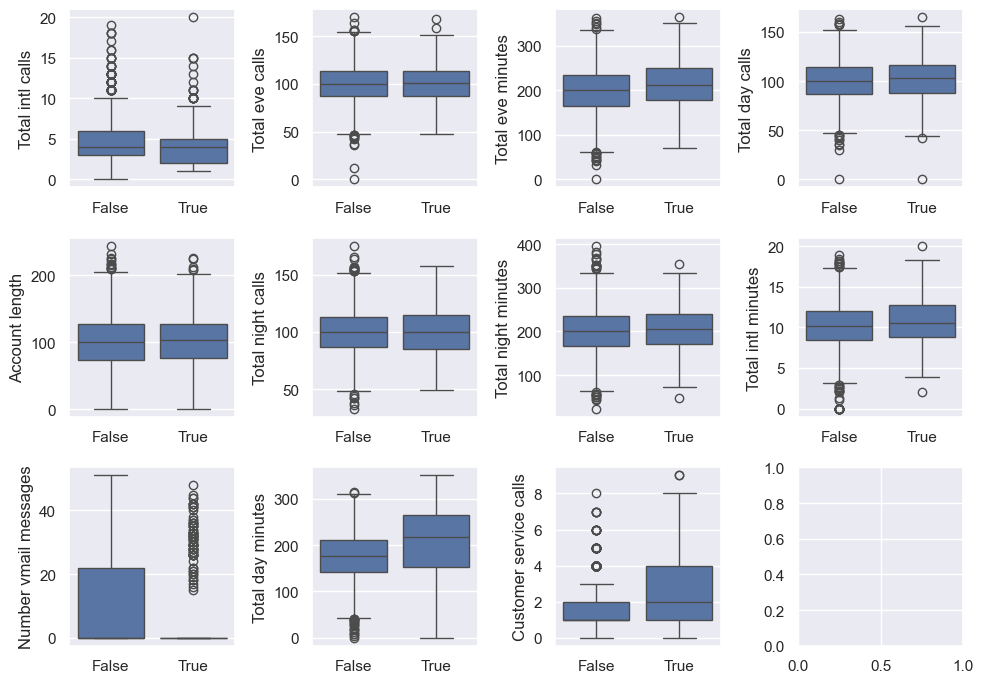

In [28]:
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

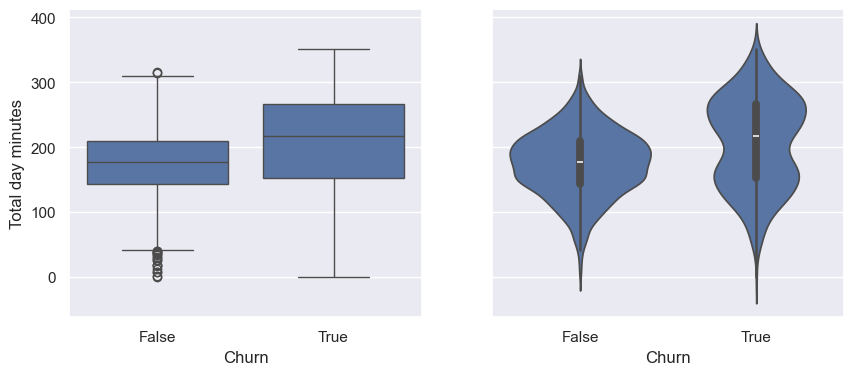

In [29]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1]);

/Users/timurandronaki/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


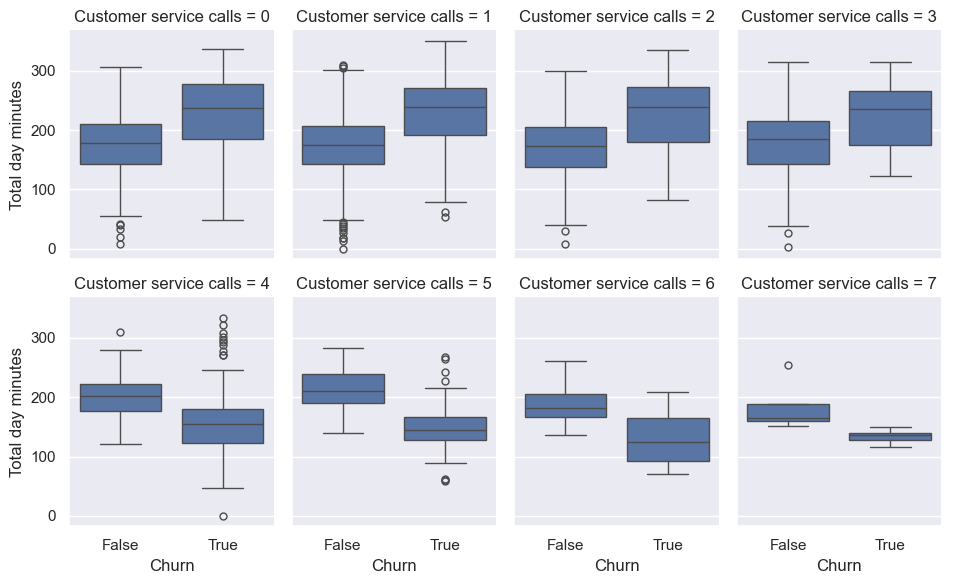

In [30]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
);

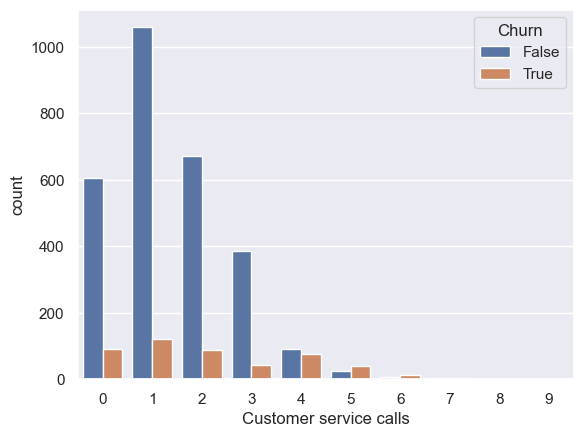

In [31]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

In [32]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [33]:
X = df.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 58.8 s, sys: 15.4 s, total: 1min 14s
Wall time: 13.8 s


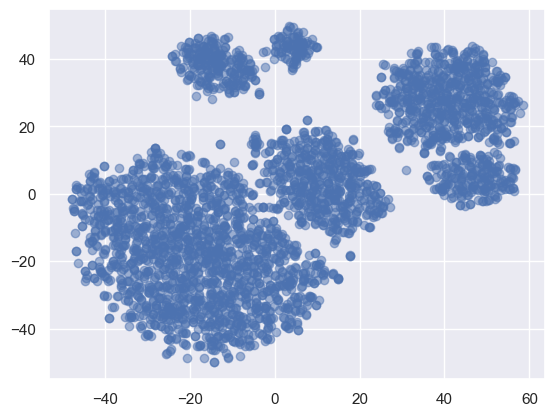

In [37]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);

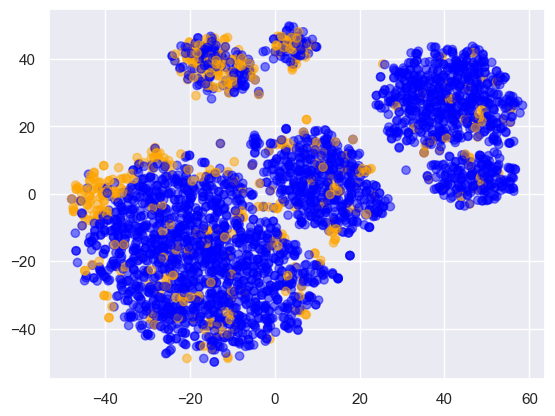

In [38]:
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=df["Churn"].map({False: "blue", True: "orange"}),
    alpha=0.5,
);

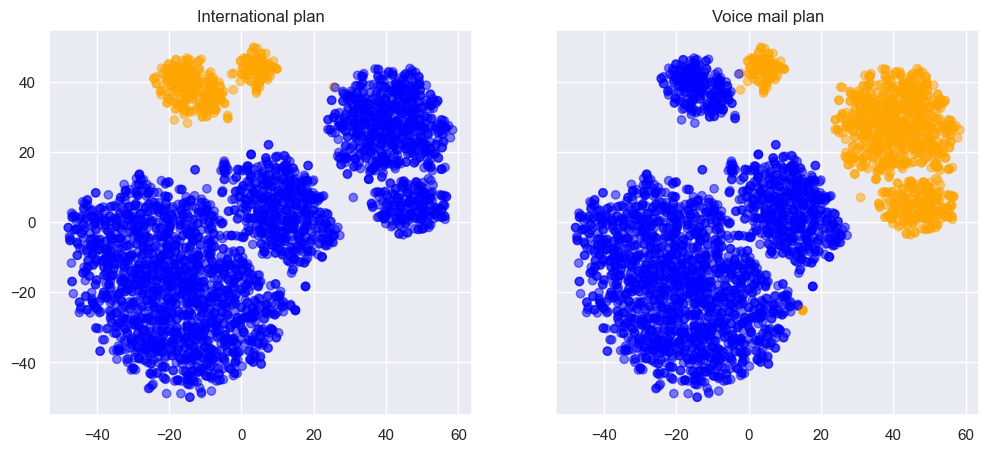

In [39]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=df[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name);

## TASK

In [40]:
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [41]:
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [42]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [43]:
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

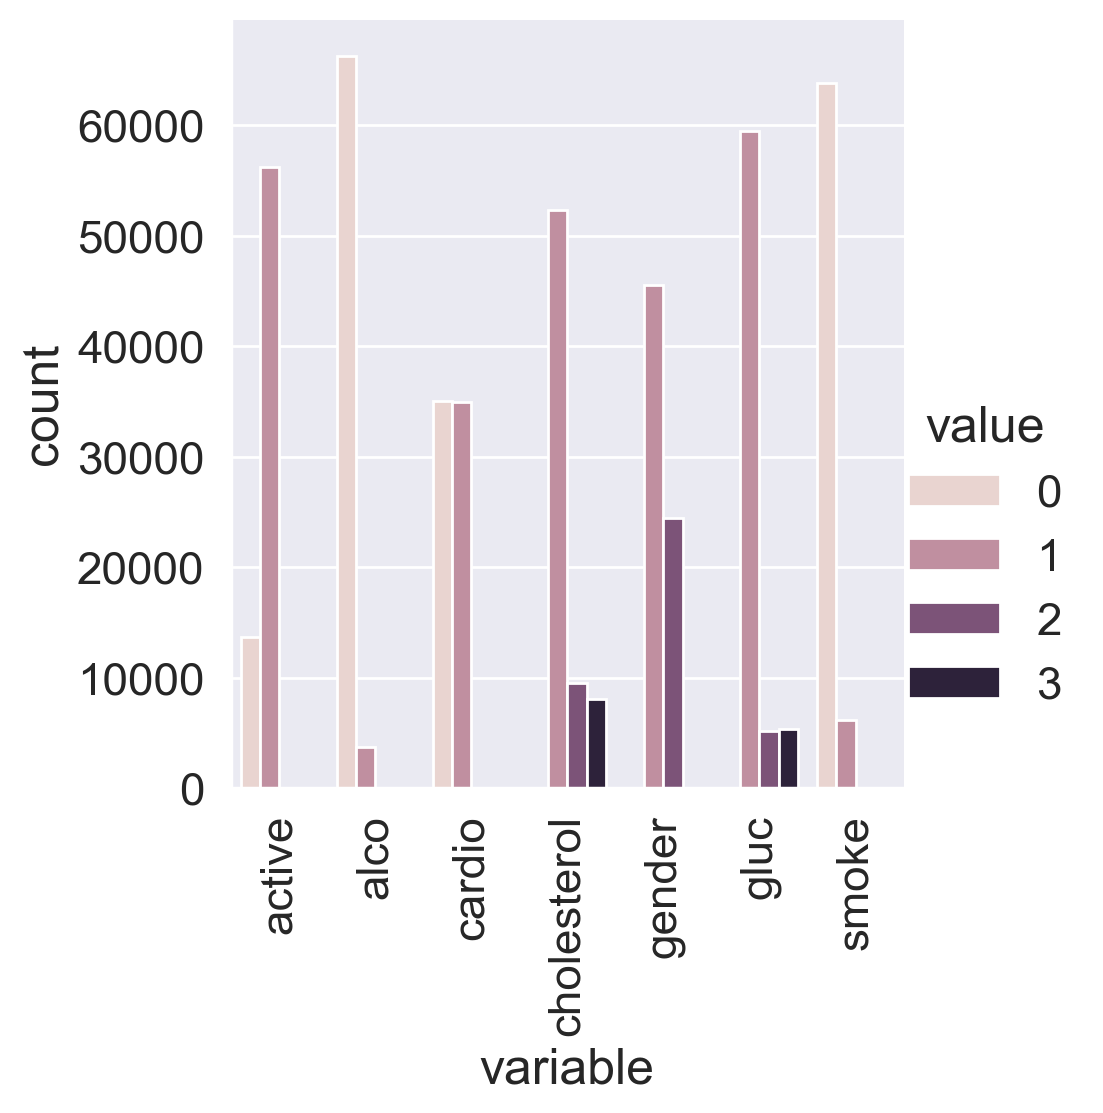

In [44]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar"
)
plt.xticks(rotation='vertical');

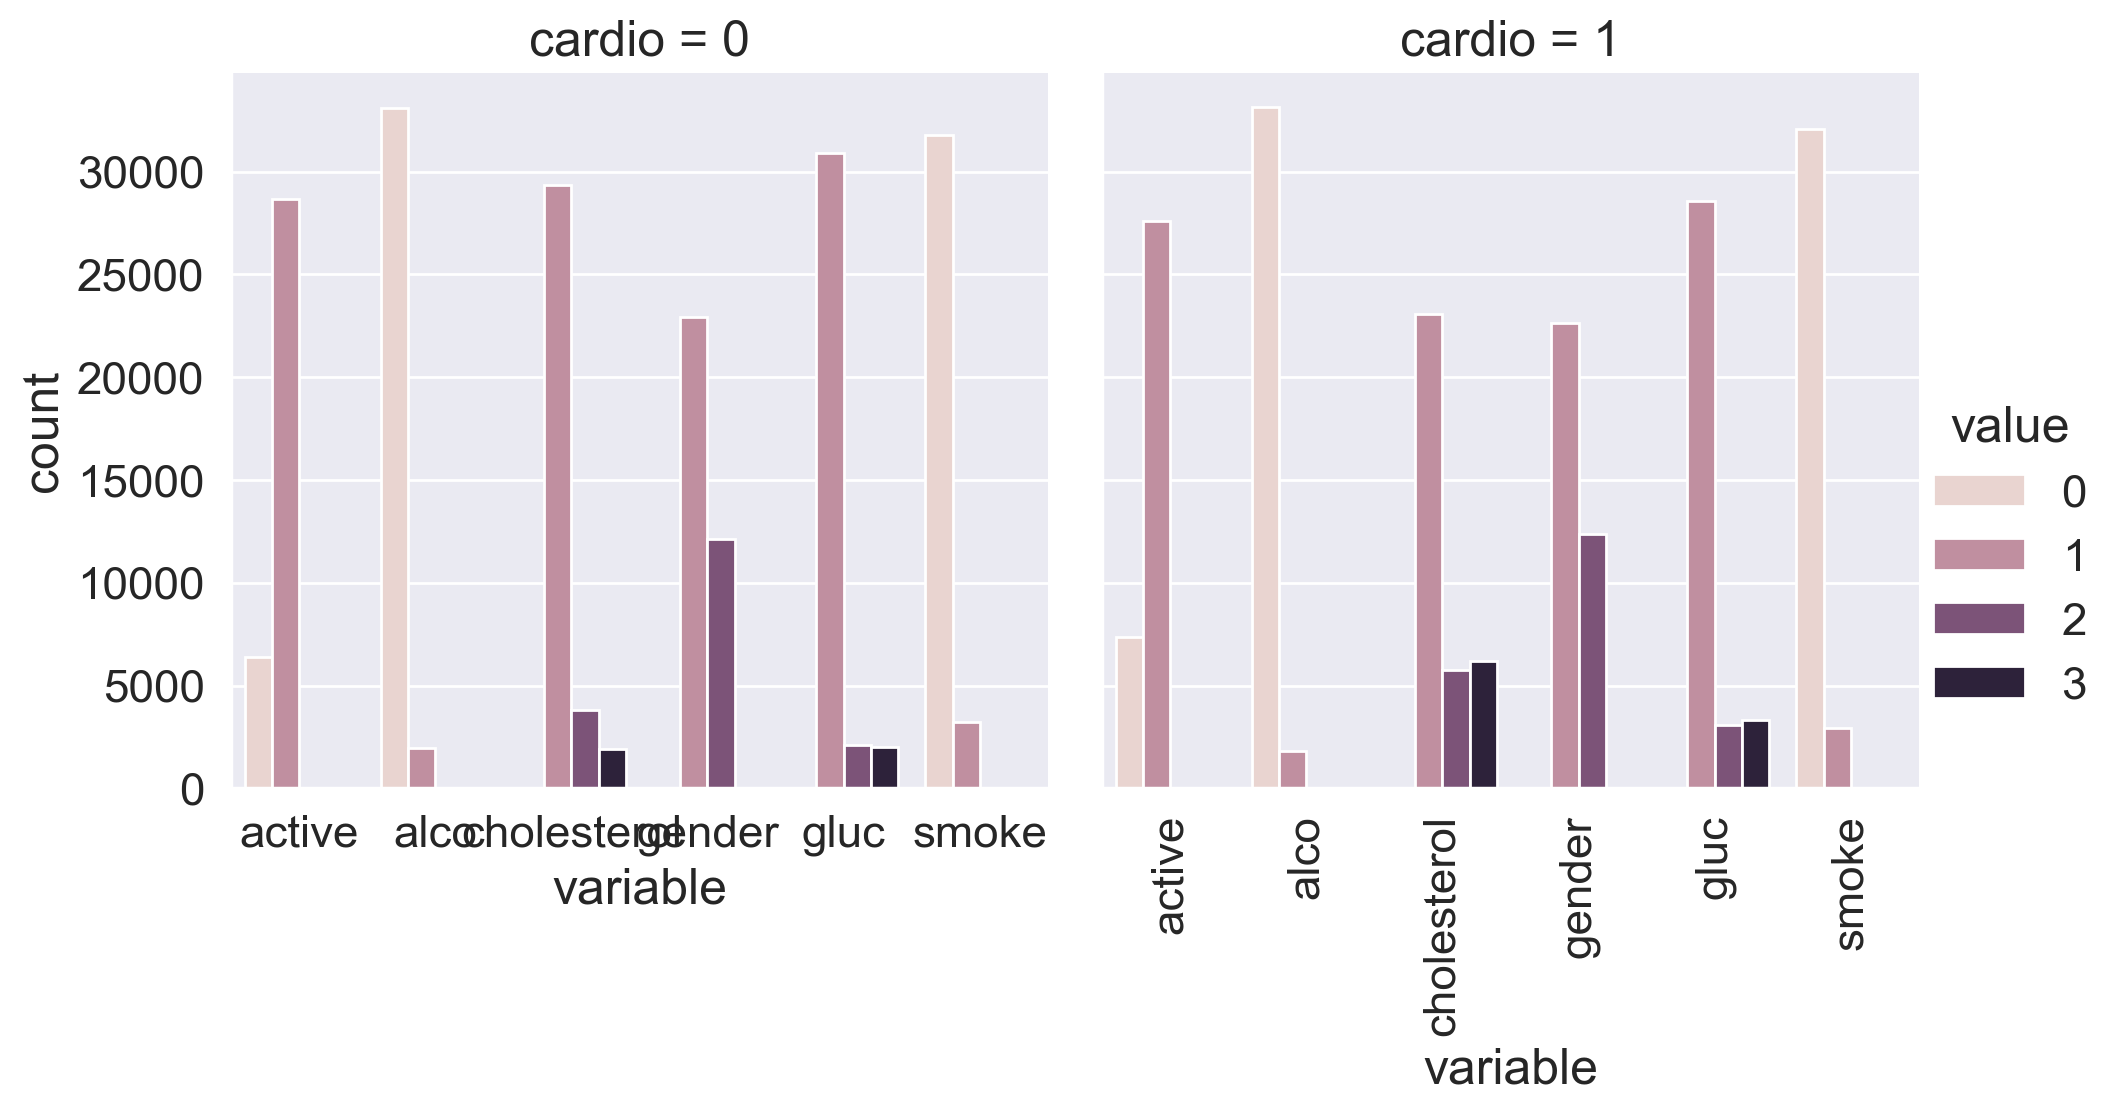

In [45]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar",
)
plt.xticks(rotation='vertical');

Question 1.1. 
How many men and women are present in this dataset? Values of the gender feature were not given (whether “1” stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.<br>
<br>
*45530 women and 24470 men<br>
45530 men and 24470 women<br>
45470 women and 24530 men<br>
45470 men and 24530 women<br>

In [70]:
df.groupby("gender")["gender"].count()

gender
1    45530
2    24470
Name: gender, dtype: int64

Question 1.2. (1 point). Who more often report consuming alcohol – men or women?

women<br>
*men

In [61]:
df.groupby("gender")["alco"].mean();

Question 1.3. (1 point). What’s the rounded difference between the percentages of smokers among men and women?

4<br>
16<br>
*20<br>
24<br>

In [68]:
female_smoke_perc = df[df["gender"] == 2]["smoke"].mean()
male_smoke_perc = df[df["gender"] == 1]["smoke"].mean()
round((female_smoke_perc - male_smoke_perc) * 100)

20

Question 1.4. (1 point). What’s the rounded difference between median values of age (in months) for non-smokers and smokers? You’ll need to figure out the units of feature age in this dataset.

5<br>
10<br>
15<br>
*20<br>


In [82]:
smokers_median = df[df["smoke"] == 1]["age"].median() / 365.25
nosmokers_median = df[df["smoke"] == 0]["age"].median() / 365.25
round((nosmokers_median-smokers_median) * 12)

20

Question 1.5. (2 points). Calculate fractions of ill people (with CVD) in the two groups of people described in the task. What’s the ratio of these two fractions?
Рассчитайте доли больных людей (с сердечно-сосудистыми заболеваниями) в двух группах людей, описанных в задаче. Каково соотношение этих двух дробей?

In [85]:
df["age_years"] = (df["age"] / 365.25).round().astype("int")

In [86]:
smoking_old_men = df[
    (df["gender"] == 2)
    & (df["age_years"] >= 60)
    & (df["age_years"] < 65)
    & (df["smoke"] == 1)
]

In [87]:
smoking_old_men[
    (smoking_old_men["cholesterol"] == 1) & (smoking_old_men["ap_hi"] < 120)
]["cardio"].mean()

0.2631578947368421

In [88]:
smoking_old_men[
    (smoking_old_men["cholesterol"] == 3)
    & (smoking_old_men["ap_hi"] >= 160)
    & (smoking_old_men["ap_hi"] < 180)
]["cardio"].mean()

0.8636363636363636

Question 1.6. (2 points). Choose the correct statements:.

Median BMI in the sample is within boundaries of normal values.<br>
*Women’s BMI is on average higher then men’s.<br>
Healthy people have higher median BMI than ill people.<br>
*In the segment of healthy and non-drinking men BMI is closer to the norm than in the segment of healthy and non-drinking women<br>

In [89]:
df["BMI"] = df["weight"] / (df["height"] / 100) ** 2

In [90]:
df["BMI"].median()

26.374068120774975

In [91]:
df.groupby("gender")["BMI"].median()

gender
1    26.709402
2    25.910684
Name: BMI, dtype: float64

In [92]:
df.groupby(["gender", "alco", "cardio"])["BMI"].median().to_frame()

BMI
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

Question 1.7. (2 points). What percent of the original data (rounded) did we filter out in the previous step?

8<br>
9<br>
*10<br>
11<br>

In [94]:
df_to_remove = df[
    (df["ap_lo"] > df["ap_hi"])
    | (df["height"] < df["height"].quantile(0.025))
    | (df["height"] > df["height"].quantile(0.975))
    | (df["weight"] < df["weight"].quantile(0.025))
    | (df["weight"] > df["weight"].quantile(0.975))
]
print(df_to_remove.shape[0] / df.shape[0])

filtered_df = df[~df.index.isin(df_to_remove)]

0.0963


Plot a correlation matrix using heatmap(). You can create the matrix using the standard pandas tools with the default parameters.

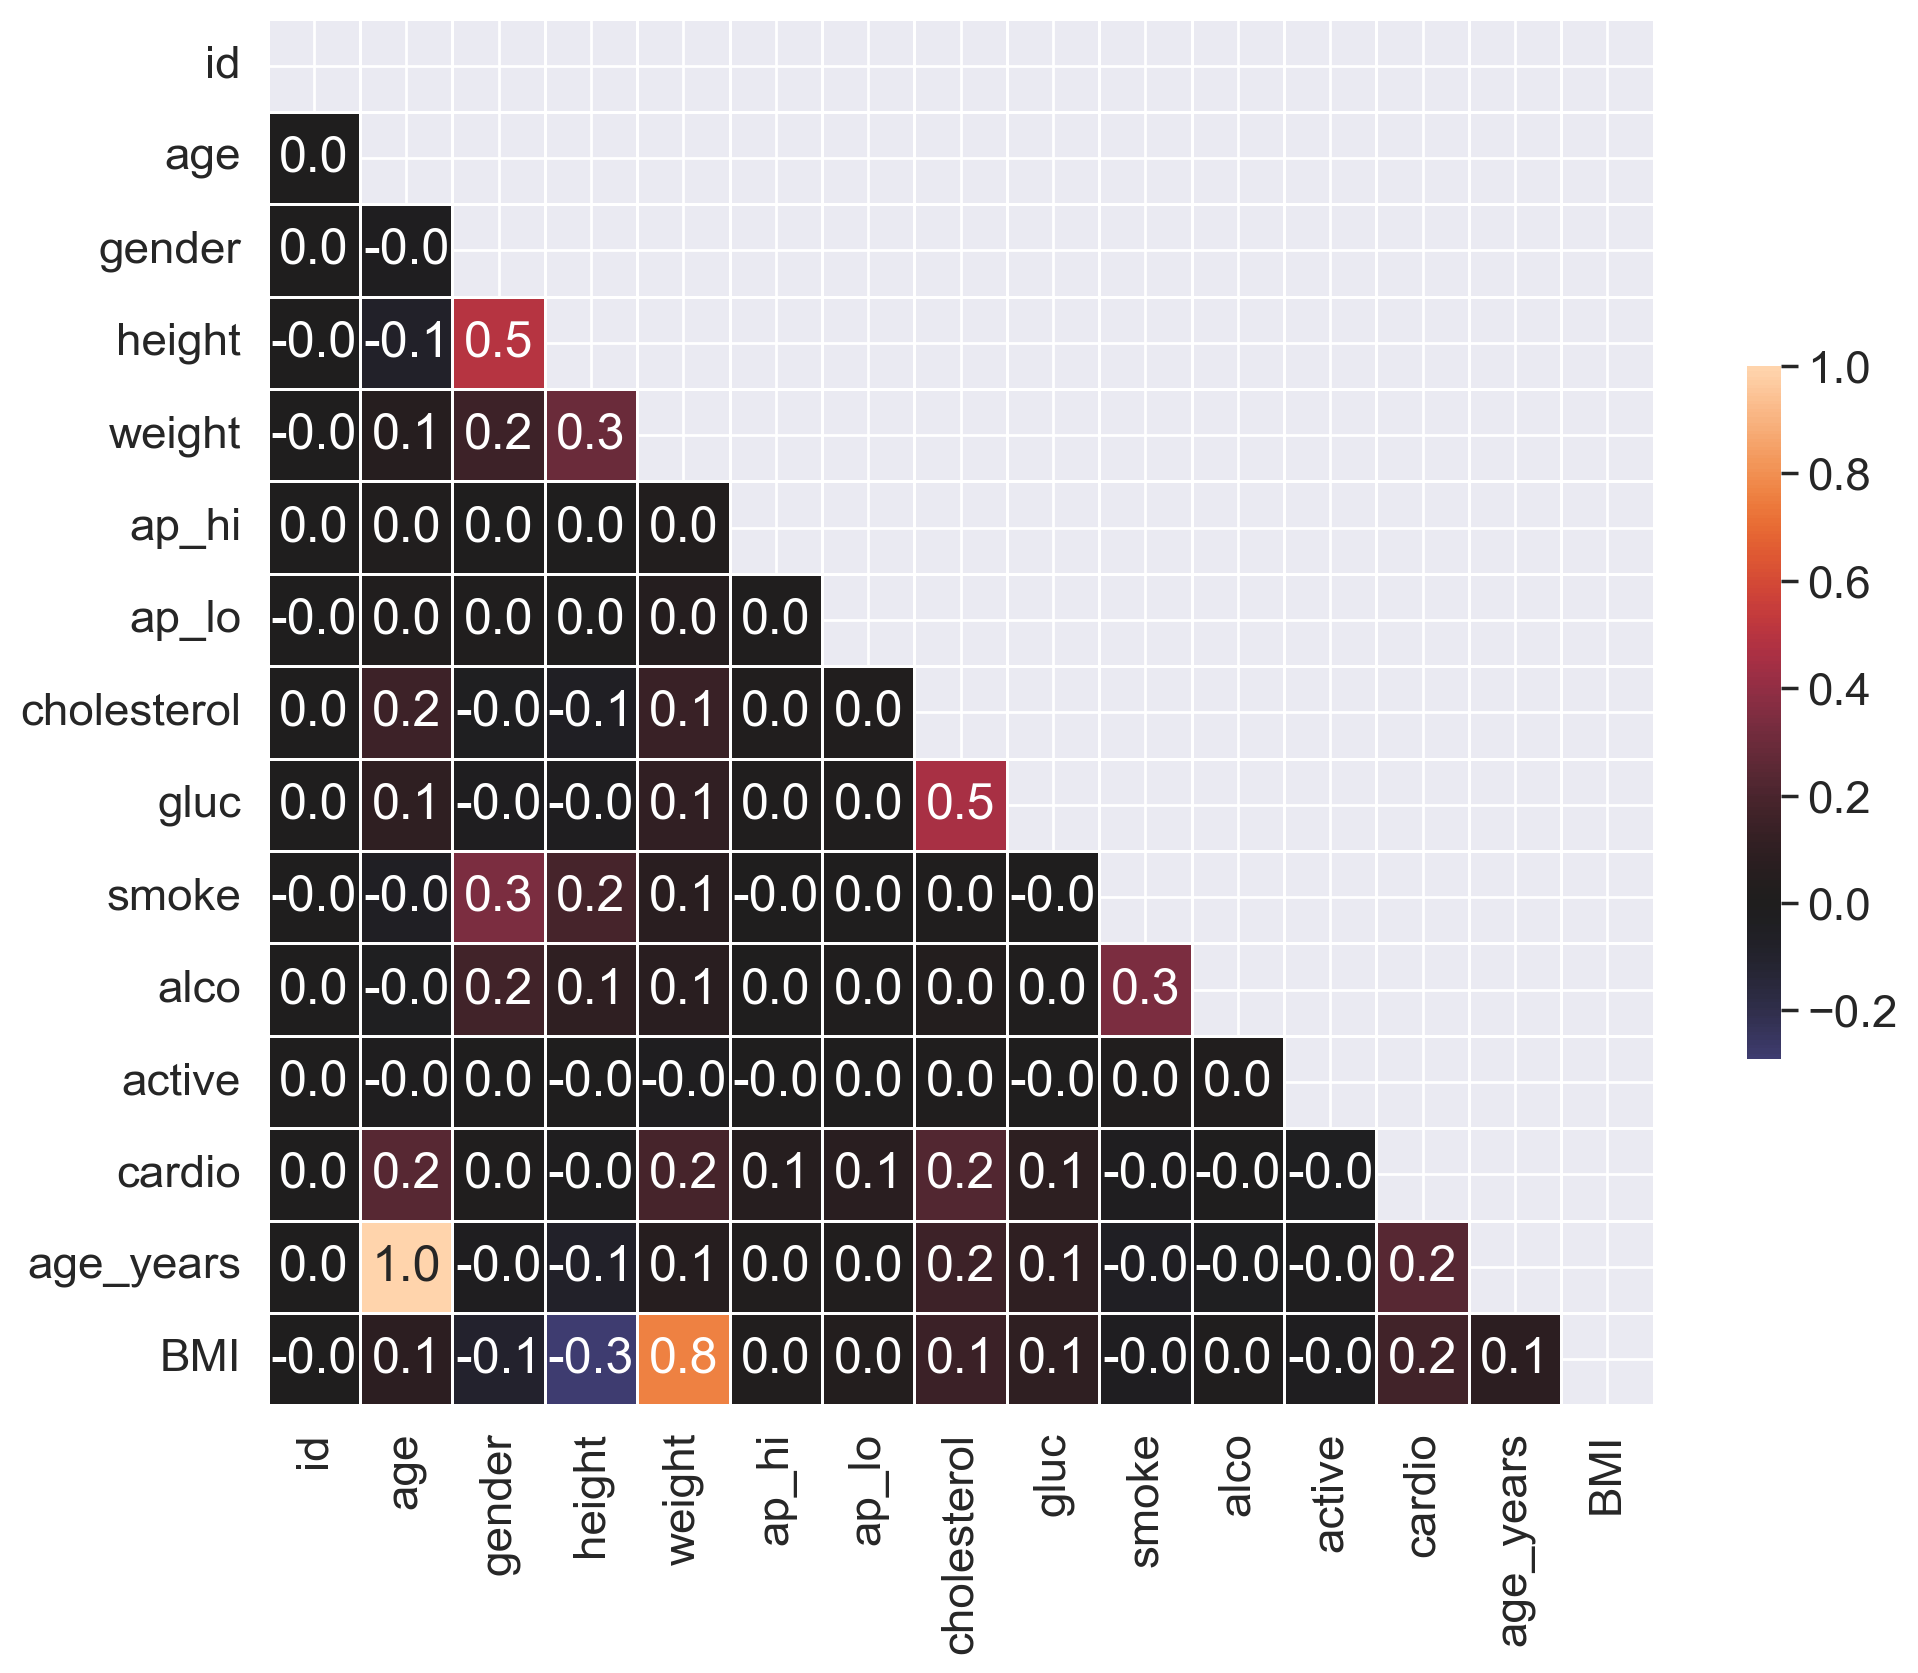

In [96]:
df = filtered_df.copy()

corr = df.corr(method="pearson")

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".1f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

Create a violin plot for the height and gender using violinplot(). Use the parameters:



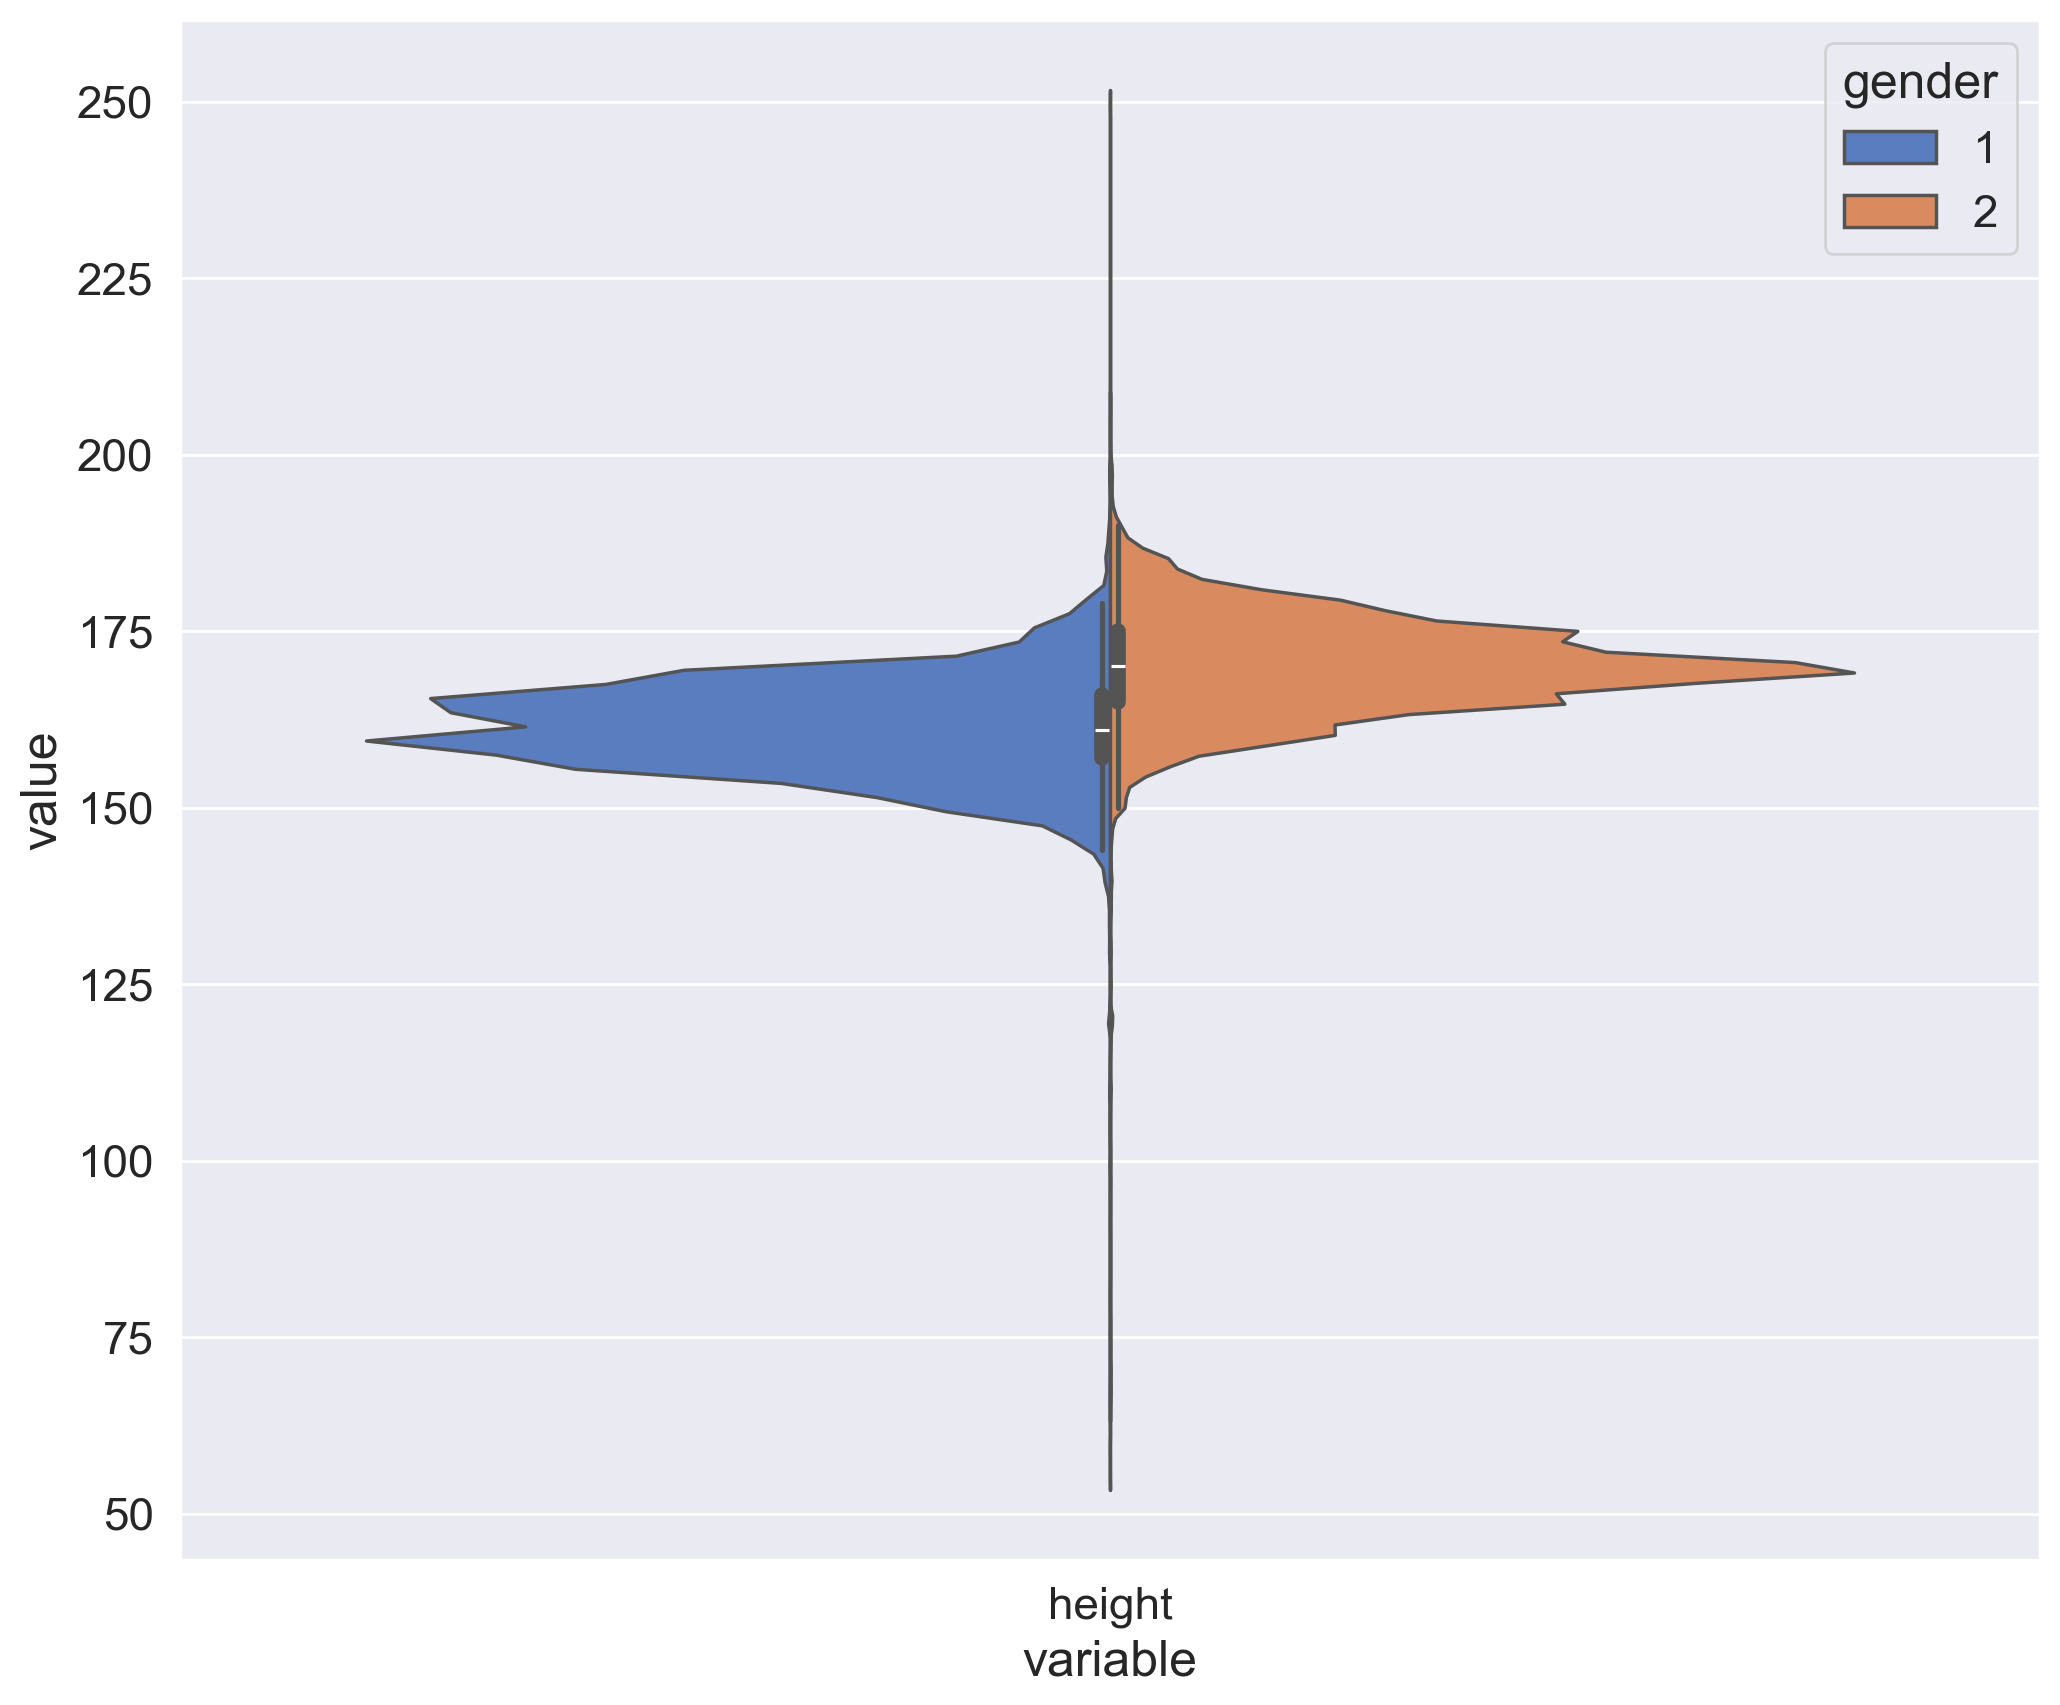

In [97]:
df_melt = pd.melt(frame=df, value_vars=["height"], id_vars=["gender"])

plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x="variable",
    y="value",
    hue="gender",
    palette="muted",
    split=True,
    data=df_melt,
    scale="count",
    scale_hue=False,
)

Calculate and plot a correlation matrix using the Spearman’s rank correlation coefficient.

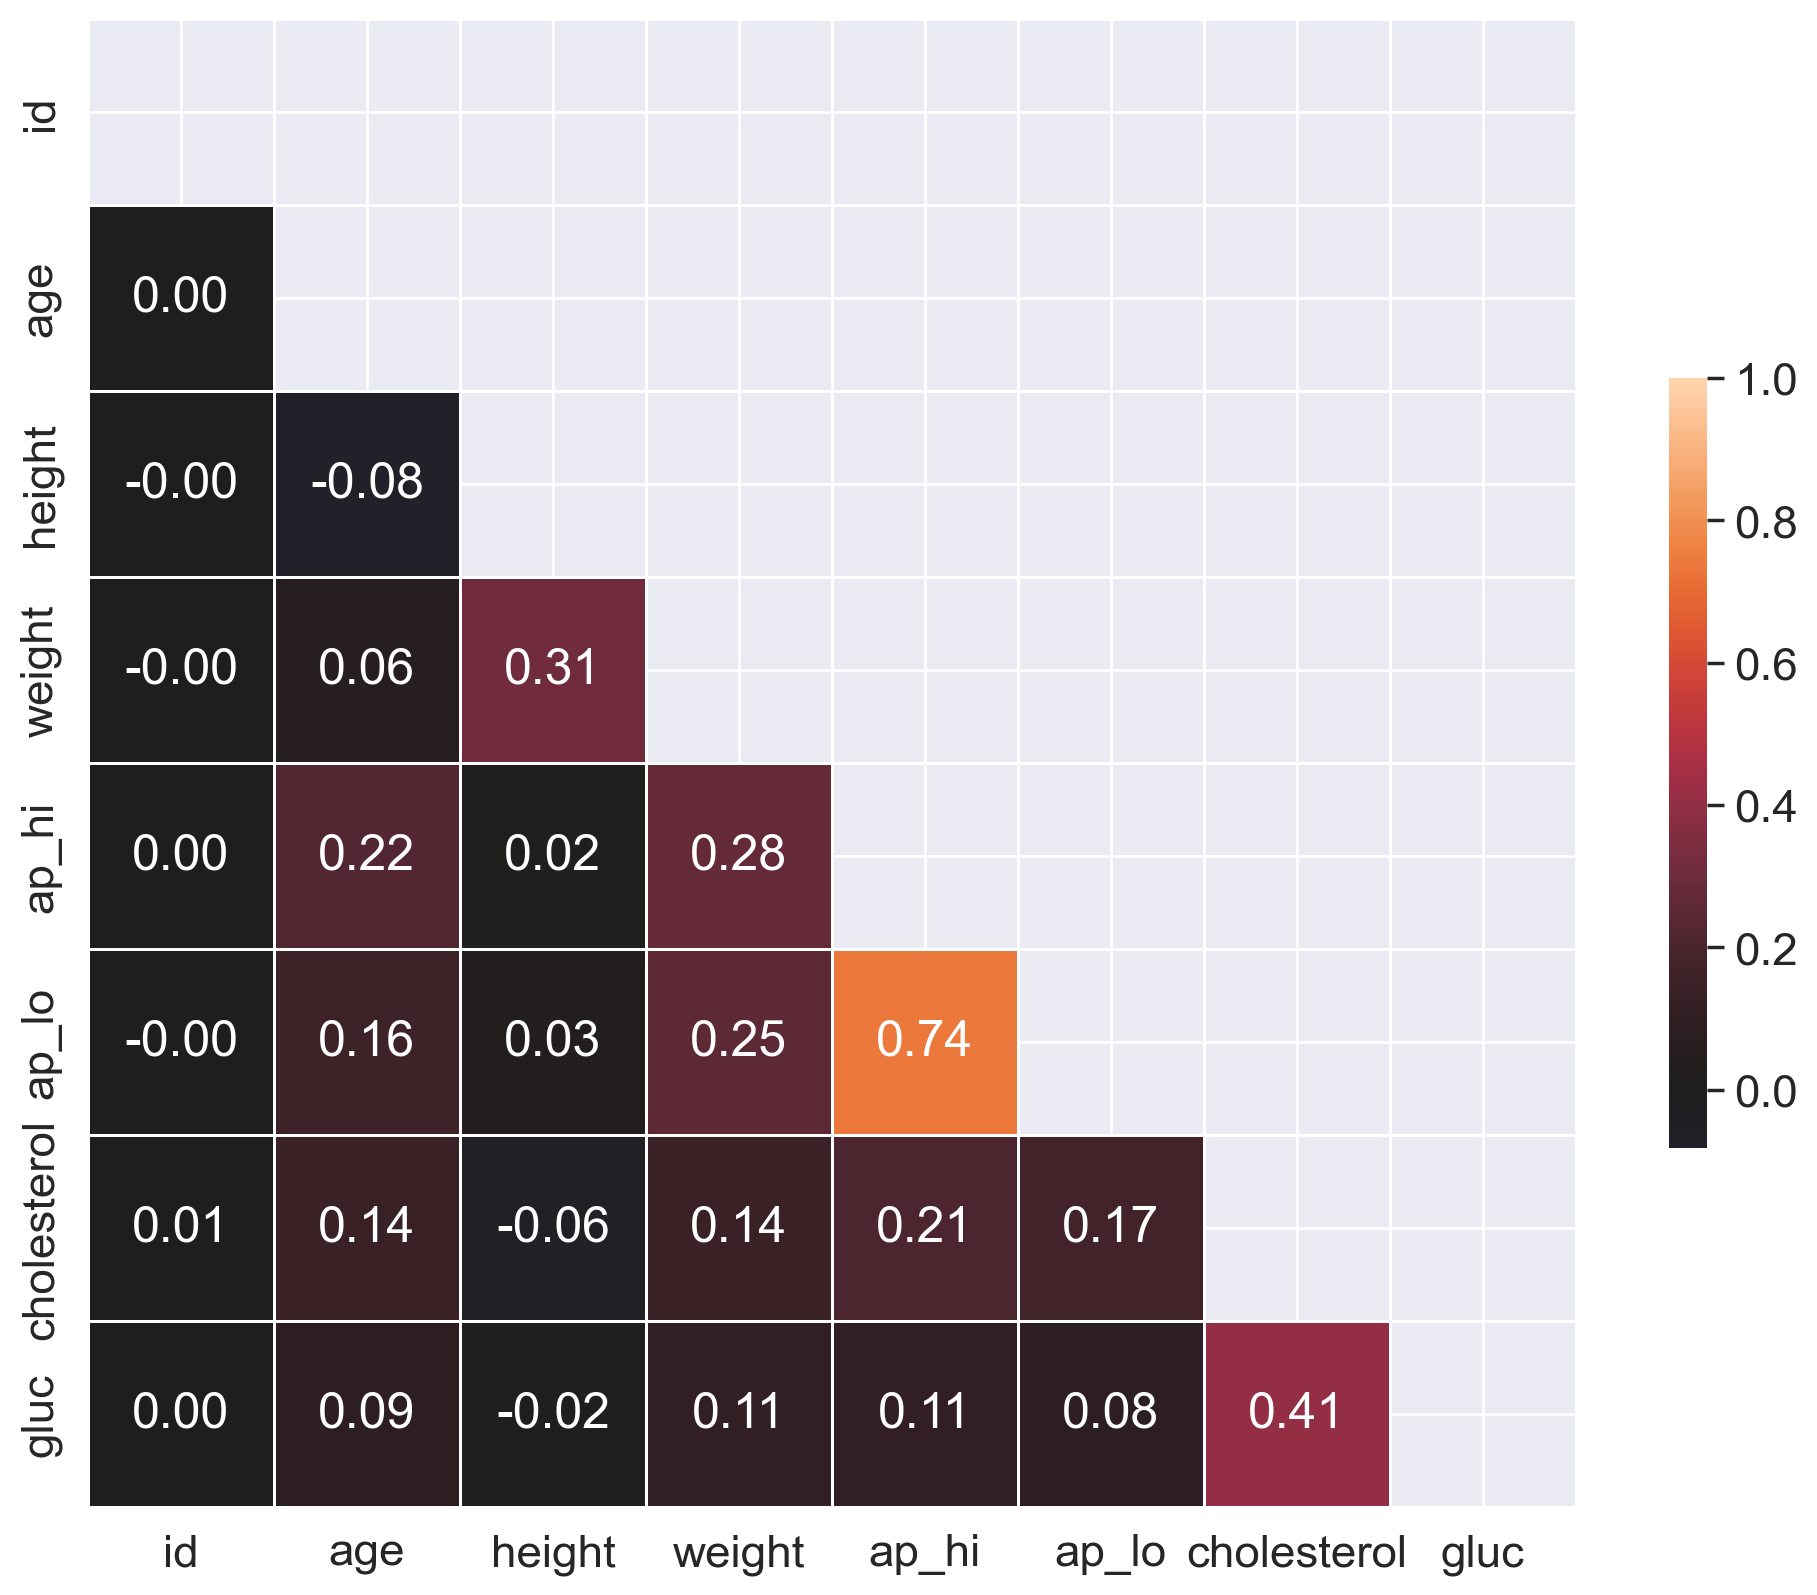

In [98]:
corr = df[
    ["id", "age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc"]
].corr(method="spearman")

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

Create a count plot using countplot(), with the age on the X axis and the number of people on the Y axis. Each value of the age should have two columns corresponding to the numbers of people of this age for each cardio class.



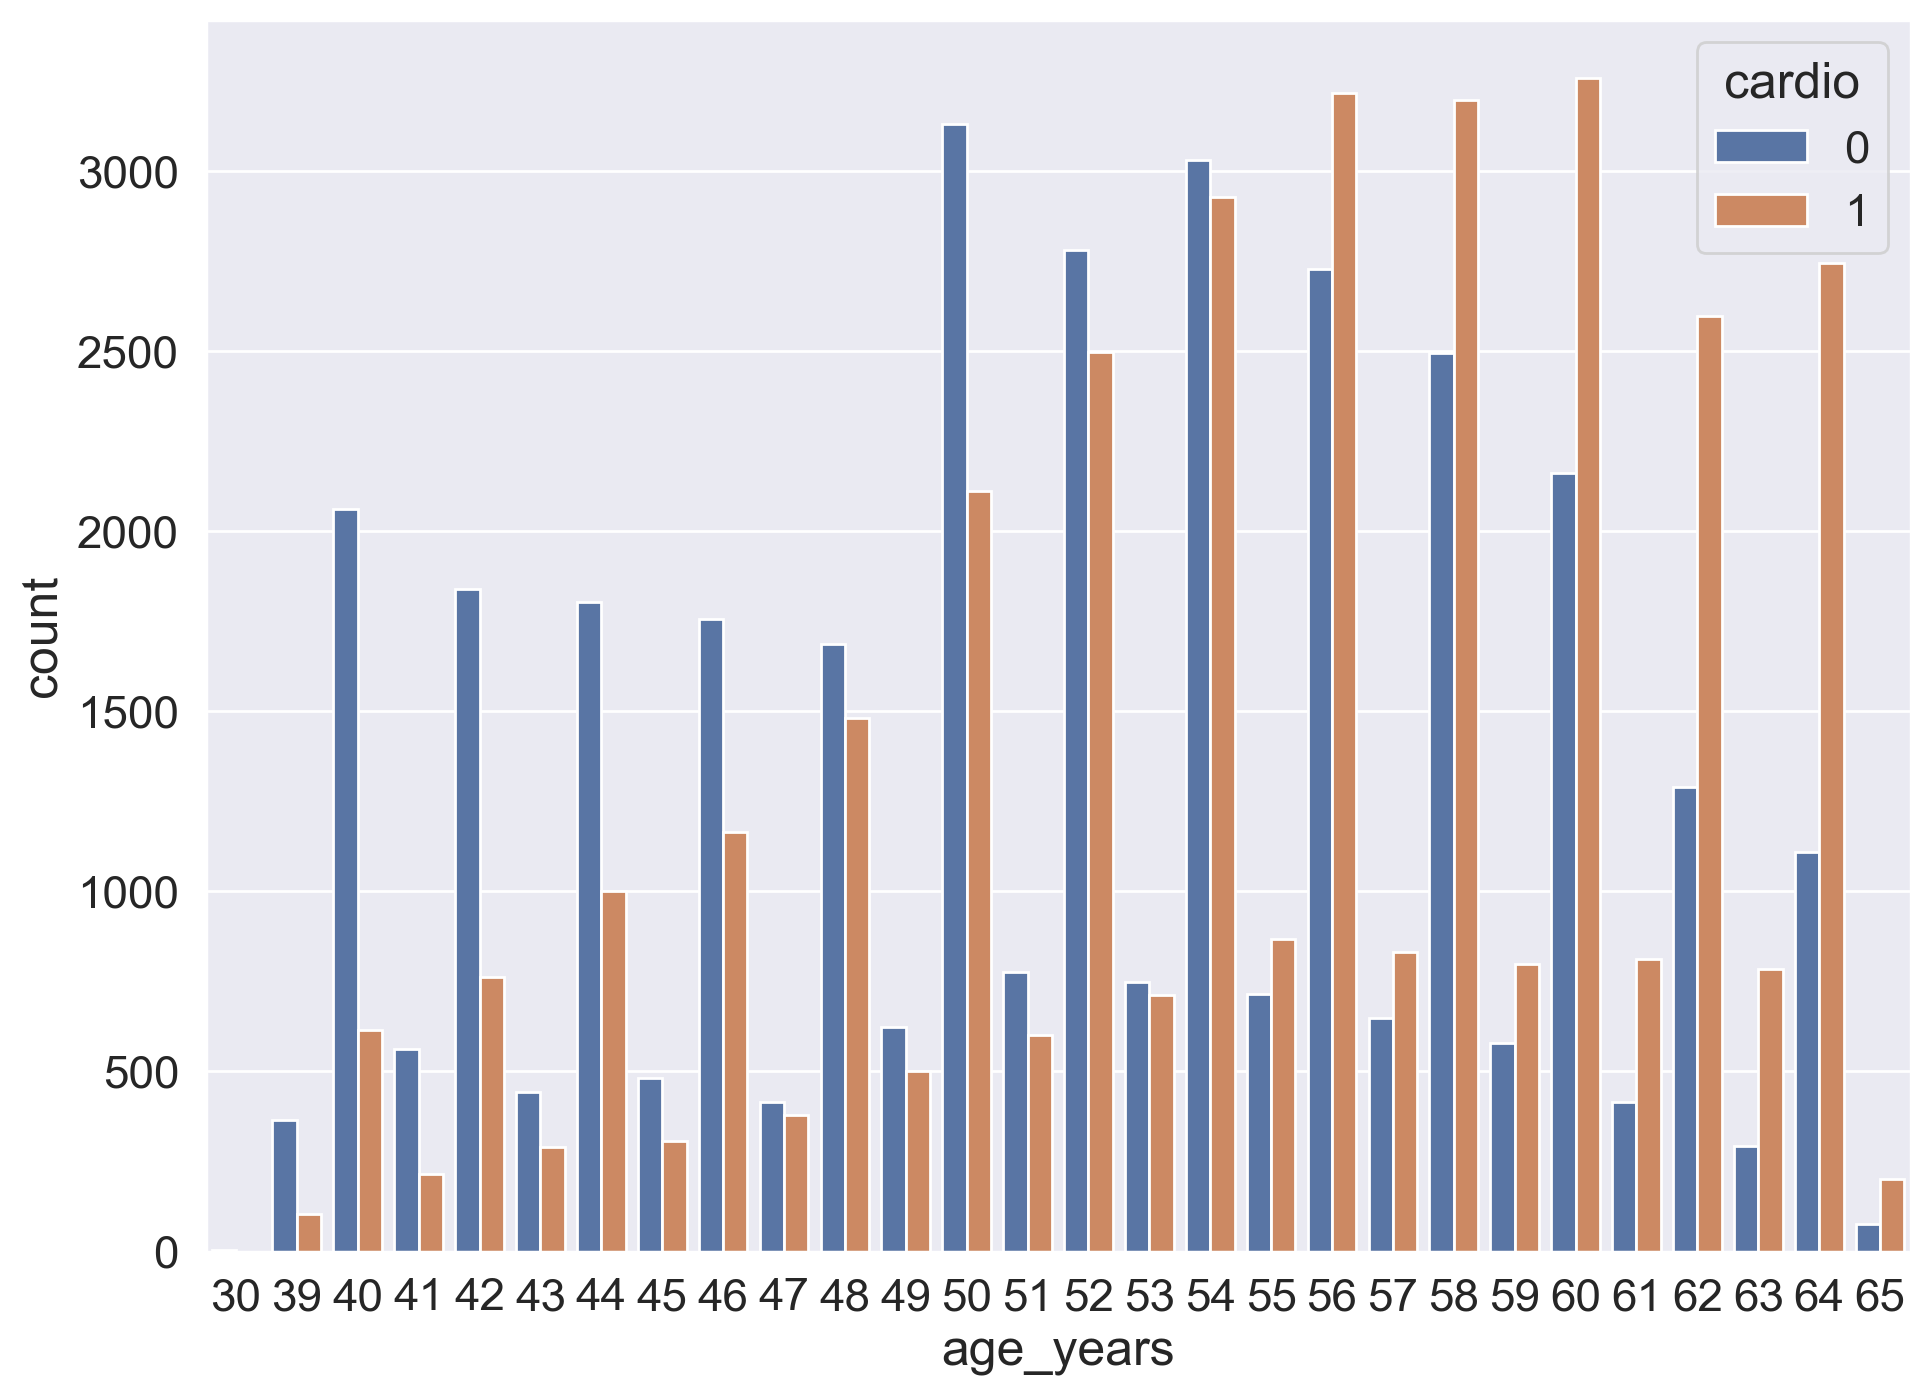

In [99]:
sns.countplot(x="age_years", hue="cardio", data=df);